# 支持向量机 SVM

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 1 线性svm
### 1.1 读入数据

(51, 2) (51, 1)


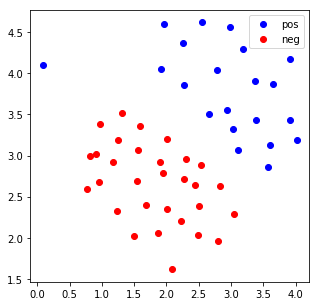

In [3]:
data1 =loadmat('data/ex6data1.mat')
X, y = data1['X'], data1['y']
print(X.shape,y.shape)
pos = X[np.where(y == 1)[0],:]
neg = X[np.where(y == 0)[0],:]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()

### 1.2 训练并画出分界线

In [5]:
## 这里使用sklearn的模型进行训练
## 并比较C为不同值时的分界线有何区别
model1 = svm.SVC(C=1, kernel='linear')
model1.fit(X,y)
model2 = svm.SVC(C=100, kernel='linear')
model2.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


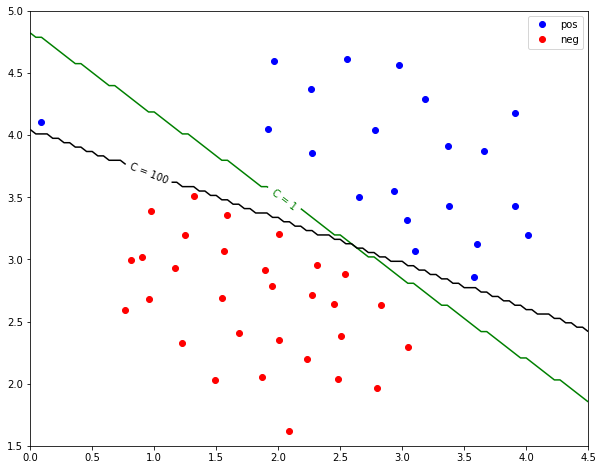

In [6]:
def drawBoundray(svm_model, xmin, xmax, ymin, ymax, color):
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(100):
        for j in range(100):
            val = np.array([xvals[i],yvals[j]])
            zvals[i,j]  = svm_model.predict(val.reshape(1,2))
    zvals = zvals.T
    boun = ax.contour( xvals, yvals, zvals, [0],colors=color)
    return boun
    
fig, ax = plt.subplots(figsize=(10,8))
boun1 = drawBoundray(model1, 0,4.5,1.5,5, color='green')
plt.clabel(boun1,inline=True,fontsize=10,fmt = { 0:'C = %d'%1})
boun2 = drawBoundray(model2, 0,4.5,1.5,5, color='black')
plt.clabel(boun2,inline=True,fontsize=10,fmt = { 0:'C = %d'%100})
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()  

## 2 高斯核函数SVM
### 2.1 高斯kernel

In [7]:
def gaussian_kernel(x1, x2, sigma):
    return np.sum(np.exp(- np.power(x1 - x2, 2)) / (2 * (sigma ** 2)))

### 2.2 数据集2

(863, 2) (863, 1)


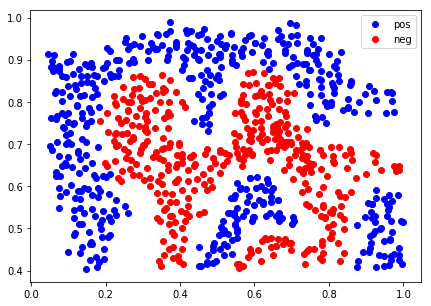

In [8]:
data2 =loadmat('data/ex6data2.mat')
X, y = data2['X'], data2['y']
print(X.shape,y.shape)
pos = X[np.where(y == 1)[0],:]
neg = X[np.where(y == 0)[0],:]
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


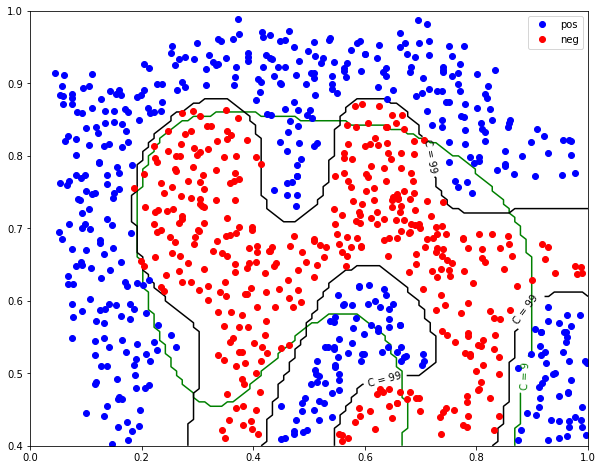

In [9]:
# 比较gamma对分界线的影响
# 可以看出gamma越大，模型越拟合
model3 = svm.SVC(C=1, kernel='rbf', gamma=9)
model3.fit(X,y)
model4 = svm.SVC(C=1, kernel='rbf', gamma=99)
model4.fit(X,y)

fig, ax = plt.subplots(figsize=(10,8))
boun3 = drawBoundray(model3, 0,1,0.4,1, color='green')
plt.clabel(boun3,inline=True,fontsize=10,fmt = { 0:'C = %d'%9})
boun4 = drawBoundray(model4, 0,1,0.4,1, color='black')
plt.clabel(boun4,inline=True,fontsize=10,fmt = { 0:'C = %d'%99})
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()

### 2.3 数据集3

(211, 2) (211, 1)
(200, 2) (200, 1)


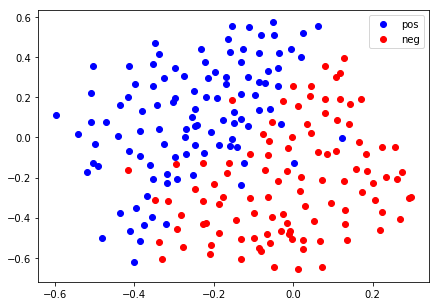

In [10]:
#该数据集中有训练集和测试集，可以用来寻找支持向量机的最优参数
data3 =loadmat('data/ex6data3.mat')
X, y = data3['X'], data3['y']
print(X.shape,y.shape)
#测试集
Xval,yval=data3['Xval'], data3['yval']
print(Xval.shape,yval.shape)
pos = X[np.where(y == 1)[0],:]
neg = X[np.where(y == 0)[0],:]
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()

In [12]:
#寻找最佳参数
Cvals = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.])
gammavals = Cvals**-2
score=[]
param=[]
for i in Cvals:
    for j in gammavals:
        svm_model = svm.SVC(C=i,kernel='rbf',gamma=j)
        svm_model.fit(X,y)
        score.append(svm_model.score(Xval,yval))
        param.append((i,j))
max_index = score.index(max(score))
print('最优参数C=' + str(param[max_index][0]) + ';gamma=' + str(param[max_index][1]))
print('最优结果score='+str(score[max_index]))

最优参数C=0.3;gamma=99.99999999999999
最优结果score=0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


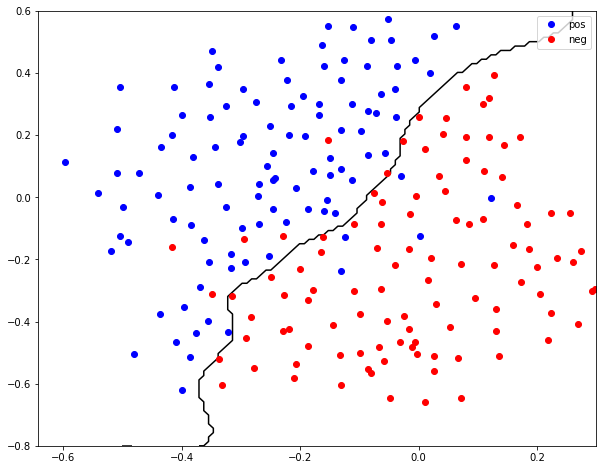

In [17]:
# 画最优边界
model5 = svm.SVC(C=param[max_index][0],kernel='rbf',gamma=param[max_index][1])
model5.fit(X,y)
fig, ax = plt.subplots(figsize=(10,8))
drawBoundray(model5, -0.5,0.3,-0.8,0.6, color='black')
ax.plot(pos[:,0],pos[:,1],'bo',label='pos')
ax.plot(neg[:,0],neg[:,1],'ro',label='neg')
plt.legend()
plt.show()